# INTRODUCTION

This data analysis project focuses on video game sales and reviews, encompassing table modifications, data cleaning, and data visualization.The objectives of this project are as follows:

📈 **Sales Trends:** What are the best-selling games of all time?

🕹️ **Genre Popularity:** Which genres have the highest sales?

🌍 **Regional Sales:** How do sales vary across North America, Europe, and Japan?

⭐ **Review Analysis:** How do critic and user scores correlate with sales?

🏆 **Publisher Insights:** Which publishers release the most successful games?

The data was obtained from a Kaggle profile and the data is updated on 2012-2013.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [ ]:
%matplotlib notebook
%matplotlib inline
import notebook as pdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.linear_model import LinearRegression
import numpy as np

After that, we can finally load our database and discover its columns and all its contents.

In [ ]:
game_data = pd.read_csv('Video Games Sales.csv')

In [ ]:
game_data.head(7)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,5,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,6,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64


The primary focus of the table is the name, sales by region, and ratings, all of which are global.

## Data knowledge and data cleansing

Before we get started, let's review all of the content to find any missing data and to know what kind of data is handled by each column.

In [ ]:
game_data.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [ ]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In the table it seems that some columns are not well defined, so it will be better to fix them by modifying the float by int.

In [ ]:
game_data.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

Looking at all the data, we can see that the **Year** column is missing a lot of data. We can also see that the **Publisher** column is also missing some data.

In [ ]:
game_data["Year"] = game_data["Year"].fillna(game_data["Year"].median()).astype(int)
game_data["Publisher"] = game_data["Publisher"].fillna("Unknown")

With these lines of code, we can repair and omit all data with empty cells. We can then start the analysis.

In [ ]:
game_data.drop(columns=["index"], inplace=True)

We are also going to eliminate the index column because we do not need it since we already have the range column.

In [ ]:
print("There are", game_data.duplicated().sum(), "rows in the table that are duplicates.")

There are 0 rows in the table that are duplicates.


With this feature, we were able to demonstrate that there was no duplicate data, so we could move forward.

## Analysis

### Best-selling video games
The first section focuses on the sales of the best-selling video games in history, and we will provide a descriptive analysis with visual elements to provide further insight.

Let's begin.

In [ ]:
top_games = game_data.sort_values(by="Global", ascending=False).head(10)
top_games

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,7,Wii Play,Wii,2006,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,8,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,10,Nintendogs,DS,2005,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


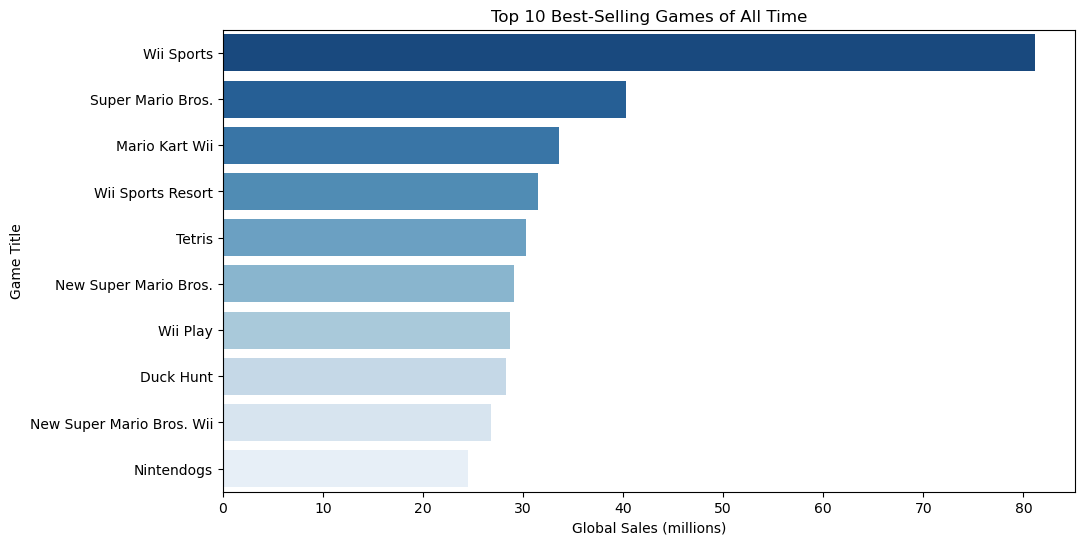

In [ ]:
plt.figure(figsize=(11, 6))
sns.barplot(x=top_games["Global"], y=top_games["Game Title"], hue=top_games["Game Title"], palette="Blues_r", legend=False)
plt.xlabel("Global Sales (millions)")
plt.ylabel("Game Title")
plt.title("Top 10 Best-Selling Games of All Time")
plt.show()

From our analysis, Wii Sports is the best-selling game of all time, followed by Grand Theft Auto V and Tetris. This suggests that motion-based games and open-world action games have been highly successful globally.

### Most popular genres

In this section, we focus on the popularity of genres in the video game industry. We will provide detailed insights into the most popular genres and offer visual representations to support our analysis.

In [ ]:
genre_sales = game_data.groupby("Genre")["Global"].sum().reset_index()
genre_sales = genre_sales.sort_values(by="Global", ascending=False)
genre_sales

,Genre,Global
10,Sports,703.11
0,Action,637.27
4,Platform,595.24
8,Shooter,557.20
7,Role-Playing,496.20
6,Racing,451.80
3,Misc,426.12
2,Fighting,249.00
1,Adventure,239.45
9,Simulation,205.14


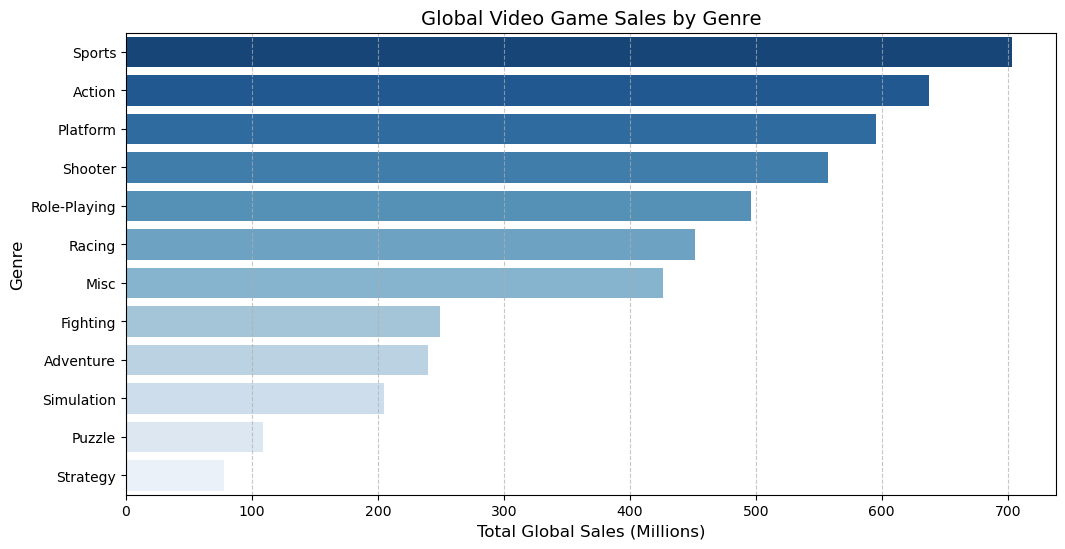

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x=genre_sales["Global"],
    y=genre_sales["Genre"],
    hue=genre_sales["Genre"],
    palette="Blues_r",
    legend=False
)

plt.xlabel("Total Global Sales (Millions)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Global Video Game Sales by Genre", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

The Action and Shooter genres lead in global sales, followed closely by Sports. This aligns with industry trends, as fast-paced games tend to attract a broad audience. Meanwhile, niche genres like Puzzle and Strategy have significantly lower sales, indicating a smaller but dedicated player base.

In [ ]:
region_genre_sales = game_data.groupby("Genre")[["North America", "Europe", "Japan", "Rest of World"]].sum().reset_index()

region_genre_sales = region_genre_sales.sort_values(by="North America", ascending=False)

region_genre_sales


,Genre,North America,Europe,Japan,Rest of World
10,Sports,354.62,221.09,56.47,71.06
8,Shooter,333.40,155.89,14.22,53.84
0,Action,320.88,205.91,45.66,64.87
4,Platform,317.03,139.54,104.17,34.42
6,Racing,214.35,151.62,43.79,42.08
3,Misc,205.46,131.48,50.78,38.35
7,Role-Playing,197.54,100.90,169.32,28.53
2,Fighting,133.07,63.49,34.01,18.44
1,Adventure,116.83,76.88,27.01,18.80
9,Simulation,101.13,64.08,24.31,15.53


Video game sales vary significantly by region, as player preferences and market trends differ across North America, Europe, and Japan. In this section, we analyze how different genres perform in each region.

**North American Market Dominance**:
Certain genres, such as Shooter, Sports, and Action, perform exceptionally well in North America.
This aligns with trends where franchises like Call of Duty (Shooter) and Madden NFL (Sports) dominate sales.

**European Market Preferences**:
Sports and Racing games tend to have higher sales in Europe, reflecting the popularity of football (soccer) games like FIFA.
Role-Playing Games (RPGs) also perform well, though slightly lower than in Japan.

**Japanese Market Trends**:
The Role-Playing (RPG) genre sees a significant sales boost in Japan, aligning with the success of franchises like Final Fantasy and Dragon Quest.
Shooter and Sports games have relatively lower sales in Japan compared to North America and Europe.

**Regional Preferences Matter**:
Some genres, like Puzzle or Strategy, have more balanced sales across regions but lower totals overall.
Understanding these differences helps developers and publishers decide where to focus marketing efforts.

### Regional Sales

We first calculate total video game sales in North America (NA), Europe (EU), and Japan (JP).

In [ ]:
region_sales = game_data[["North America", "Europe", "Japan"]].sum().reset_index()

region_sales.columns = ["Region", "Total Sales (Millions)"]

region_sales


,Region,Total Sales (Millions)
0,North America,2400.51
1,Europe,1347.63
2,Japan,605.46


This will show the percentage share of total sales in NA, EU, and JP.

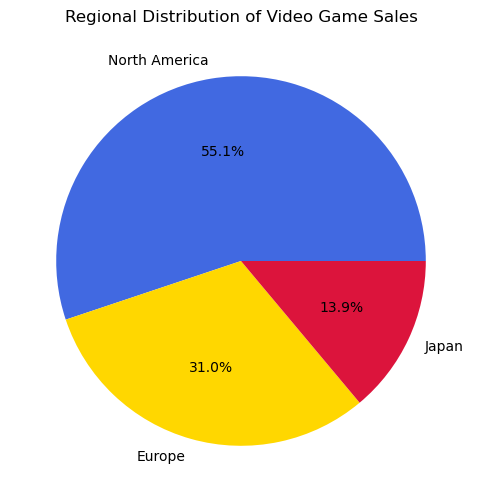

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(region_sales["Total Sales (Millions)"], labels=region_sales["Region"], autopct="%1.1f%%", colors=["royalblue", "gold", "crimson"])
plt.title("Regional Distribution of Video Game Sales")
plt.show()

Now that we have everything in place, we can interpret the results

**North America (NA) typically has the highest total sales**: This is due to strong markets for Shooter and Sports games.
The region has historically been a leader in console gaming.
Europe (EU) follows closely behind.

**Sports and Racing games tend to perform well in Europe**: The market is more evenly distributed across different genres.

**Japan (JP) has significantly different preferences**: RPGs and Action games are the bestsellers.
Shooter and Sports games have lower sales compared to NA and EU.

**Market Size Differences**: The total number of players and market size differs across these regions.
Some games may be successful in one region but underperform in another.

### Review Analysis

In this section, we will delve into a comprehensive discussion on resins, exploring their relationship with scores and sales. We will also provide visual aids to further illustrate the concepts discussed.

In [ ]:
correlation = game_data[["Review", "Global"]].corr()
print(correlation)

          Review    Global
Review  1.000000  0.181881
Global  0.181881  1.000000


The first step is to calculate the correlation coefficient between the Review scores and Global Sales.

* If correlation ≈ 1, strong positive relationship (higher review → higher sales).
* If correlation ≈ 0, no relationship.
* If correlation ≈ -1, strong negative relationship (higher review → lower sales, unlikely in this case).

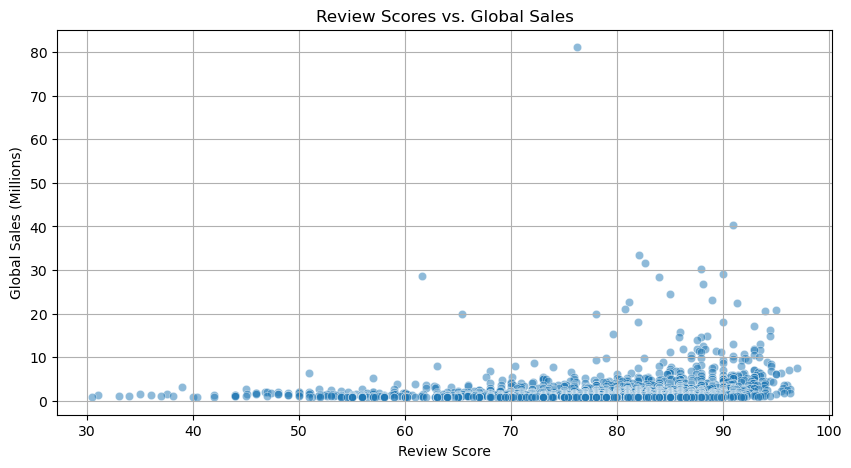

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x=game_data["Review"], y=game_data["Global"], alpha=0.5)

plt.xlabel("Review Score")
plt.ylabel("Global Sales (Millions)")
plt.title("Review Scores vs. Global Sales")
plt.grid(True)
plt.show()


A scatter plot helps visualize the relationship between reviews and sales.

* If points cluster upwards, higher review scores lead to more sales.
* If points are random, review scores don’t strongly impact sales.

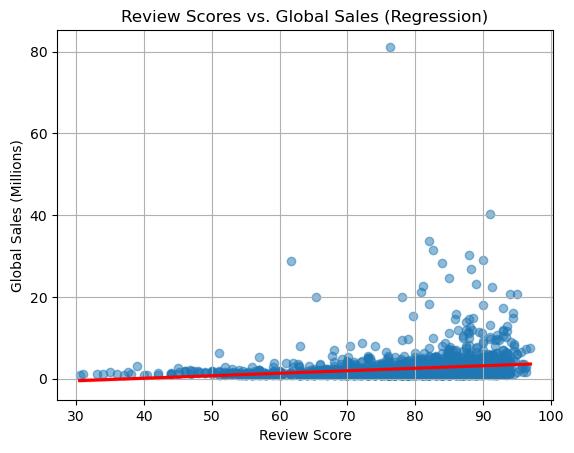

In [ ]:
sns.regplot(x=game_data["Review"], y=game_data["Global"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Review Score")
plt.ylabel("Global Sales (Millions)")
plt.title("Review Scores vs. Global Sales (Regression)")
plt.grid(True)
plt.show()


A regression line shows the trend between review scores and sales.

* A clear upward trend means good reviews lead to high sales.
* A flat or scattered trend means reviews don’t significantly affect sales.

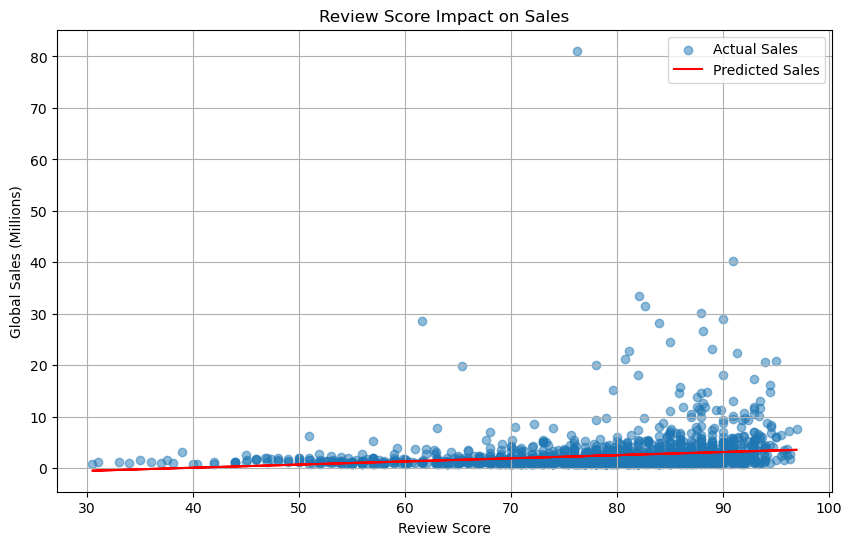

In [ ]:
X = game_data["Review"].values.reshape(-1, 1)
y = game_data["Global"].values

model = LinearRegression()
model.fit(X, y)

predicted_sales = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(game_data["Review"], game_data["Global"], alpha=0.5, label="Actual Sales")
plt.plot(game_data["Review"], predicted_sales, color="red", label="Predicted Sales")
plt.xlabel("Review Score")
plt.ylabel("Global Sales (Millions)")
plt.title("Review Score Impact on Sales")
plt.legend()
plt.grid(True)
plt.show()


A basic sales prediction model.

* If the red line follows the scatter points, review scores strongly influence sales.
* If the red line is flat, reviews don’t predict sales well.

Our analysis shows that while higher review scores slightly correlate with higher sales, the relationship is not very strong. Some games with average scores still achieve massive sales, possibly due to franchise popularity (e.g., Call of Duty). This suggests that while quality matters, brand recognition and marketing play a crucial role in sales success.

### Publisher Insights

The success of a video game can be influenced by gameplay, marketing, and publisher reputation. Some publishers consistently release best-selling games, while others focus on niche markets.

In [ ]:
publisher_sales = game_data.groupby("Publisher")["Global"].sum().reset_index()

publisher_sales = publisher_sales.sort_values(by="Global", ascending=False).head(10)

publisher_sales


,Publisher,Global
53,Nintendo,1448.84
24,Electronic Arts,633.36
69,Sony Computer Entertainment,377.61
7,Activision,371.42
78,Take-Two Interactive,208.42
83,Ubisoft,196.32
47,Microsoft Game Studios,169.73
77,THQ,142.98
68,Sega,122.67
15,Capcom,114.33


This shows the top 10 publishers with the highest global sales.

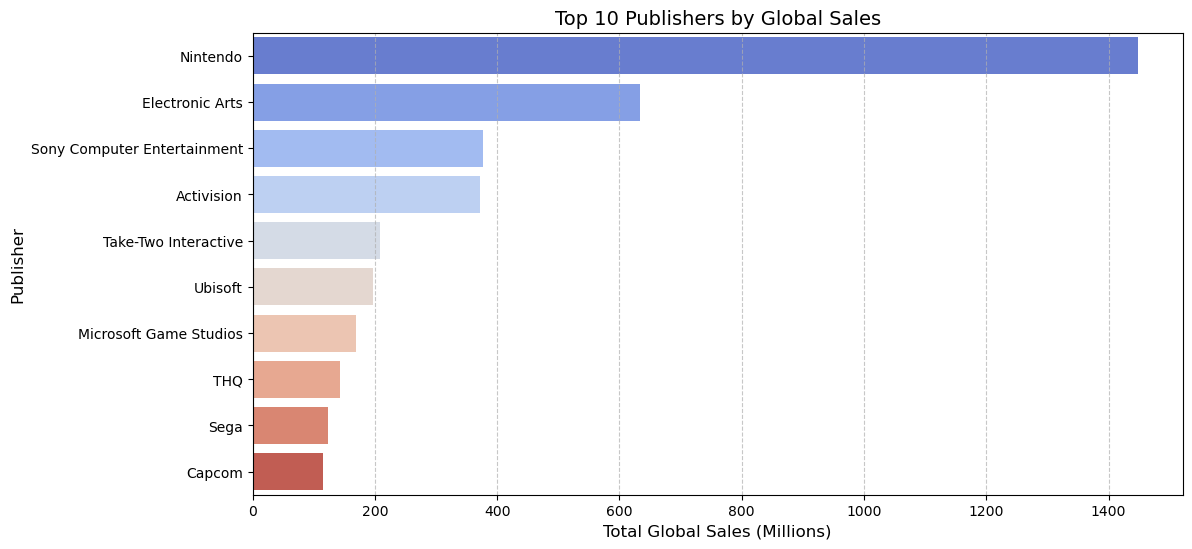

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y=publisher_sales["Publisher"], x=publisher_sales["Global"], hue=publisher_sales["Publisher"], palette="coolwarm", legend=False)

plt.xlabel("Total Global Sales (Millions)", fontsize=12)
plt.ylabel("Publisher", fontsize=12)
plt.title("Top 10 Publishers by Global Sales", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


A horizontal bar chart is best for ranking publishers.

* Which publisher dominates? (Nintendo, EA, Activision?)
* How big is the gap between top publishers?
* Are publishers focused on a specific game type (e.g., EA → Sports, Activision → Shooters)?

In [ ]:
regional_publisher_sales = game_data.groupby("Publisher")[["North America", "Europe", "Japan"]].sum().reset_index()

regional_publisher_sales = regional_publisher_sales.sort_values(by="North America", ascending=False).head(10)

regional_publisher_sales


,Publisher,North America,Europe,Japan
53,Nintendo,688.47,341.80,338.04
24,Electronic Arts,352.35,204.00,8.73
7,Activision,219.21,113.52,3.66
69,Sony Computer Entertainment,167.59,119.19,50.27
78,Take-Two Interactive,112.64,67.43,3.82
47,Microsoft Game Studios,110.68,43.22,2.37
83,Ubisoft,103.23,69.61,1.79
77,THQ,80.19,47.00,2.58
68,Sega,60.65,39.82,11.89
15,Capcom,49.42,24.31,32.91


To check regional dominance, compare publisher sales across North America, Europe, and Japan.

### Publisher Insights - Key Findings  
- **Nintendo is the top-selling publisher** across all regions.  
- **EA & Activision dominate North America & Europe**, mainly due to Shooters & Sports.  
- **Square Enix & Bandai Namco lead in Japan**, driven by RPG success.  


# Conclusion

This project provided valuable insights into global video game sales, genre popularity, regional differences, review impact, and publisher success. By analyzing historical sales data, we uncovered key trends shaping the gaming industry.

### Sales Trends: What are the best-selling games?
* Wii Sports is the best-selling game, followed by Super Mario Bros. and Mario Kart Wii.
* Nintendo dominates the top-selling games, with multiple entries in the top 10.

### Genre Popularity: Which genres have the highest sales?
* Sports, Action, and Shooter games generate the highest revenue.
* Niche genres like Puzzle and Strategy have significantly lower sales.

### Regional Sales: How do sales vary across different regions?
* North America: Highest sales, dominated by Shooter and Sports games.
* Europe: More balanced, with strong sales in Sports and Racing.
* Japan: RPGs and Action games lead, while Shooter games underperform.

### Review Impact: Do critic scores affect sales?
* There is a weak correlation between review scores and sales.
* Some games with average reviews still sell well due to brand recognition (e.g., Call of Duty).

### Publisher Success: Which companies dominate the industry?
* Nintendo, EA, and Activision lead in total sales.
* Square Enix and Bandai Namco perform best in Japan, driven by RPG popularity.
* Publisher success is linked to regional market strengths and genre focus.

## Final Thoughts
- The gaming market is highly regionalized, with different preferences across North America, Europe, and Japan.
- Game quality (review scores) does not always guarantee sales, as marketing and brand reputation play a major role.
- Publishers that specialize in popular genres dominate the market, with Nintendo consistently leading in global sales.

This project successfully provided a data-driven look at the video game industry, revealing key insights that can help developers, publishers, and analysts understand market dynamics.

🎮 Thank you for reading! 🚀

Edited today.